In [1]:
%load_ext autoreload
%autoreload 2

#Packages
import numpy as np
import matplotlib.pyplot as plt
import pickle

#.py
from core import qlearning as q 
from core import prices as pr 


### Import the data calculate on cluster thanks to the file res_multiplayers.py

In [2]:
import pickle

# Path to the pickle file
pickle_file_path = '/Volumes/OS-Data/Suzie_data/RLandPricing/data/data_multiplayers.pkl'

# Open the file in binary read mode
with open(pickle_file_path, 'rb') as file:
    aggregated_agents = pickle.load(file)

# Now, "aggregated_agents" contains the object saved in the pickle file
print(aggregated_agents)

[array([[0.25139281, 0.29713429],
       [0.29129871, 0.29322518],
       [0.25496472, 0.30483076],
       ...,
       [0.28340469, 0.31196964],
       [0.29808746, 0.282991  ],
       [0.30739323, 0.29171634]]), array([[0.18138047, 0.16339321, 0.16674548],
       [0.14974065, 0.16740069, 0.16564498],
       [0.1713049 , 0.1799808 , 0.15666298],
       ...,
       [0.17797456, 0.16547686, 0.13984522],
       [0.15641741, 0.18890256, 0.1722631 ],
       [0.17128729, 0.14629018, 0.17499038]]), array([[0.11749557, 0.13198704, 0.1181412 , 0.12866082],
       [0.11286835, 0.08154554, 0.11118297, 0.1348563 ],
       [0.10265984, 0.10171228, 0.09496807, 0.11970789],
       ...,
       [0.12301647, 0.11150039, 0.13866936, 0.09681246],
       [0.09078399, 0.12209226, 0.09844023, 0.10762814],
       [0.14640476, 0.13831941, 0.12070941, 0.10502334]]), array([[0.08072875, 0.0967383 , 0.08858121, 0.06783321, 0.09312407],
       [0.09793778, 0.09863168, 0.11035173, 0.09265197, 0.08221152],
       [0

/var/folders/1v/lw80nwsd61d7sp0q_pzj0ppm0000gp/T/ipykernel_1122/2144218038.py:35: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/Volumes/OS-Data/Suzie_data/RLandPricing/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


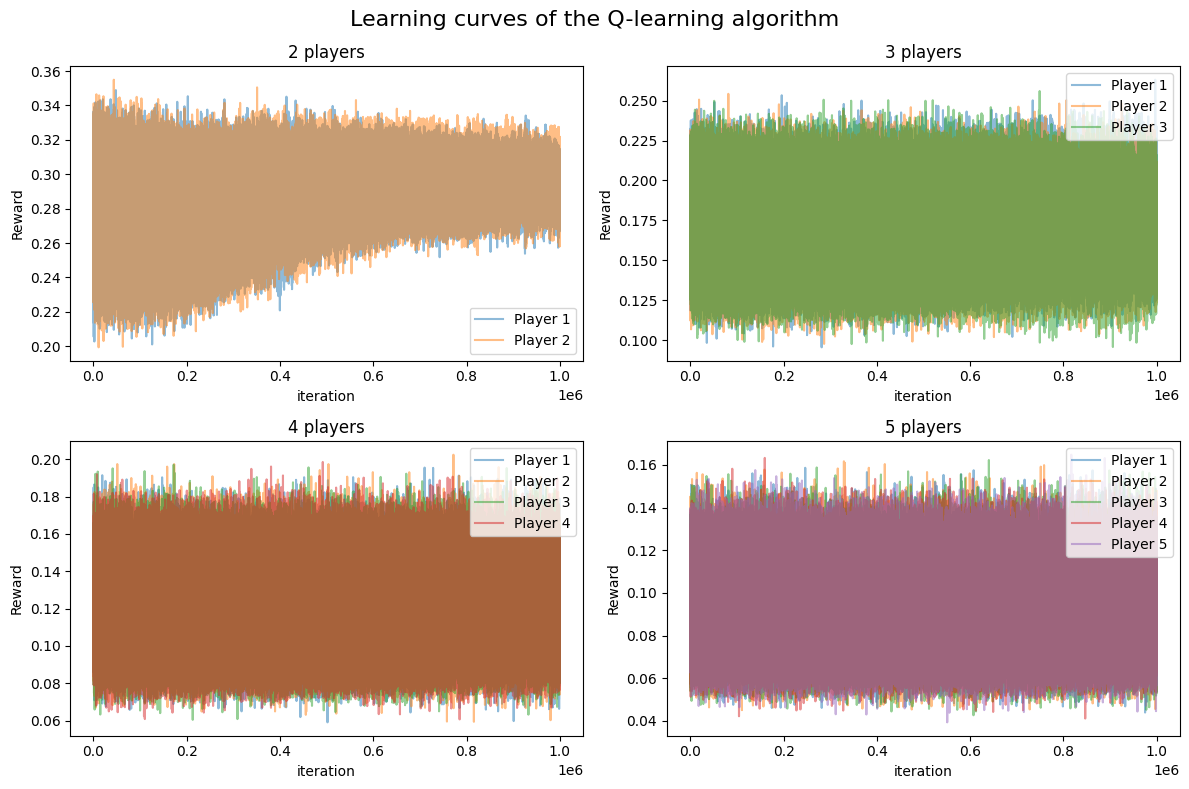

In [3]:
num_graphs = len(aggregated_agents)

# Create a figure with a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Flatten the axes array to iterate over the subplots
axes = axes.flatten()

# Loop to iterate through the periods and subplots
for graph_num in range(num_graphs):
    ax = axes[graph_num]
    num_players = len(aggregated_agents[graph_num][0])
    # Plot curves for each player in the subplot
    for player in range(num_players):
        ax.plot(aggregated_agents[graph_num][:, player], alpha=0.5, label=f'Player {player+1}')
    
    # Set the title of the subplot with the corresponding period
    ax.set_title(f'{graph_num+2} players')
    
    # Add a legend to the subplot
    ax.legend()
    
    # Set the labels of the subplot
    ax.set_xlabel('iteration')
    ax.set_ylabel('Reward')

# Remove any unused subplots
if num_graphs < 4:
    for i in range(num_graphs, 4):
        fig.delaxes(axes[i])
        
fig.suptitle('Learning curves of the Q-learning algorithm', fontsize=16)

# Adjust the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()

In [4]:
nb_players = 5
RN = []
RC = []
for i in range (2,nb_players+1):
    prices = pr.PriceOptimizer(nb_players=i)
    collusion_profit, collusion_prices = prices.CollusionPrice()
    nash_profit, nash_prices = prices.NashPrice()
    RN.append(nash_profit)
    RC.append(collusion_profit)
    
Rmean = np.zeros((len(aggregated_agents), 2))
DRmean = np.zeros((len(aggregated_agents), 2))   
    
for i in range (len(aggregated_agents)): 
    for j in range (2):
        Rmean[i][j] = aggregated_agents[i][-2:,j].mean()
        DRmean[i][j] = (Rmean[i][j] - RN[i])/(RC[i] - RN[i]) 

print(DRmean)

[[0.69990138 0.56702359]
 [0.33675462 0.36557962]
 [0.31239018 0.40915793]
 [0.2900576  0.14129576]]


[0.63346249 0.35116712 0.36077405 0.21567668]


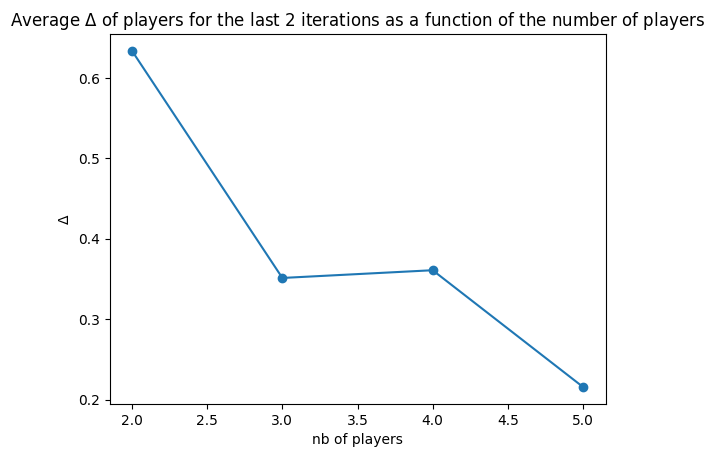

In [5]:
av = np.mean(DRmean, axis=1)
print(av)
plt.plot([2,3,4,5],av, linestyle='-', marker='o')
plt.xlabel('nb of players')
plt.ylabel('$\\Delta$')
plt.title('Average $\\Delta$ of players for the last 2 iterations as a function of the number of players')
plt.show()